<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT306 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [738]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [739]:
import pandas as pd

# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT306/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



(1) Hagamos un gráfico de barras mostrando la cantidad de películas vs series.


<Axes: xlabel='type', ylabel='count'>

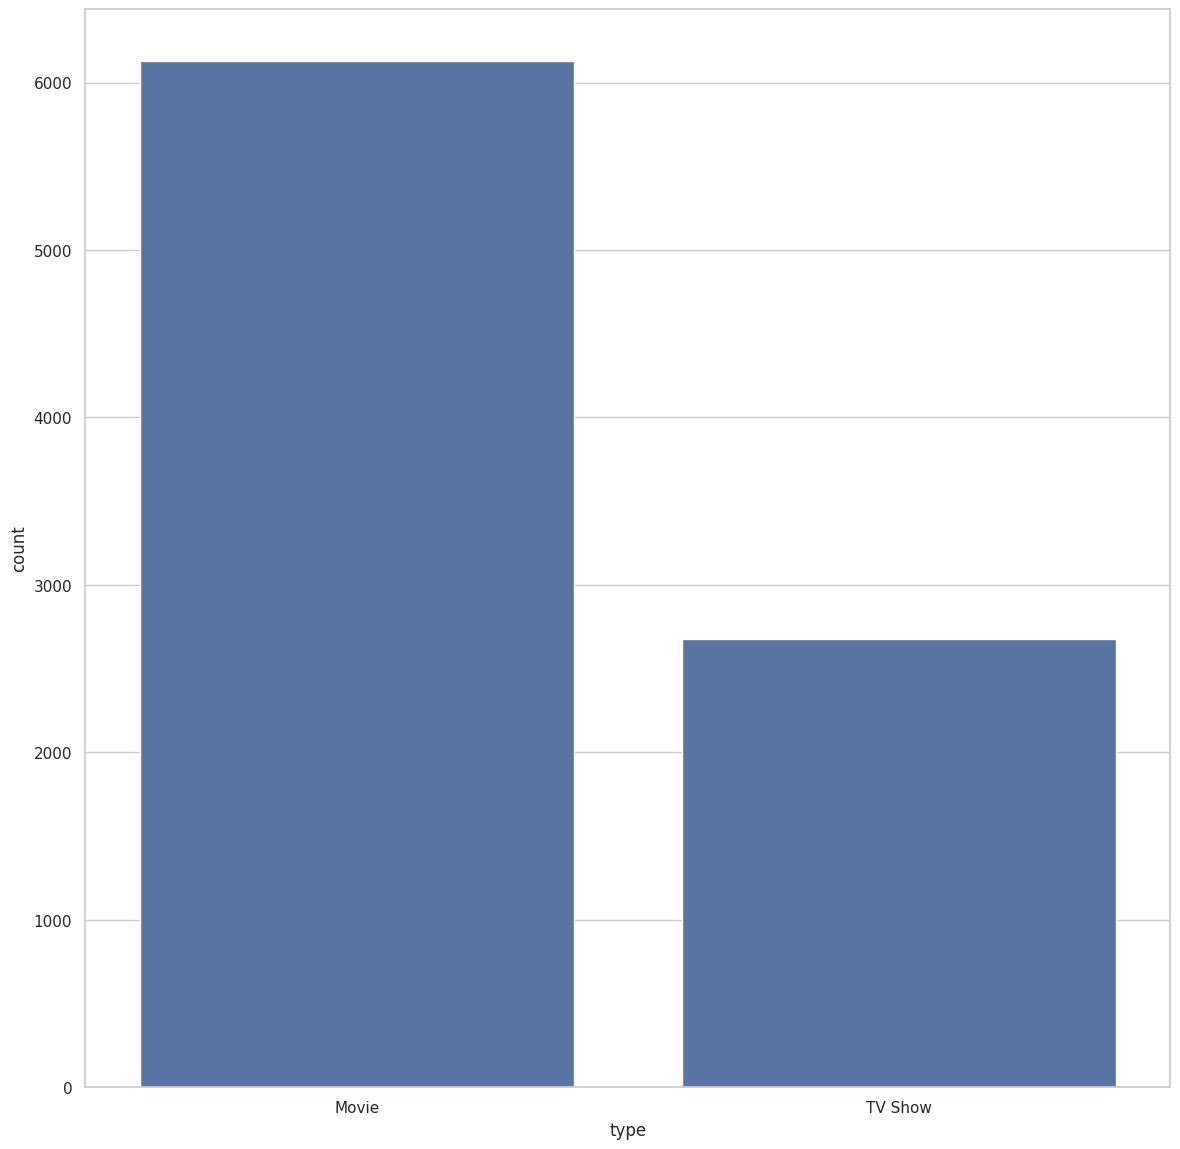

In [740]:
df_1=pd.DataFrame()
df_1=df['type'].value_counts()

sns.barplot(df_1)

Podemos ver que hay más del doble de películas que shows de televisión, mostrando que las películas son el contenido predominante en Netflix. Luego, los usuarios están mas expuestos a películas, que de acuerdo al gusto del consumidor puede ser bueno o malo.

(2) Veamos como se distribuyen los títulos según su `release_year`.

<Axes: >

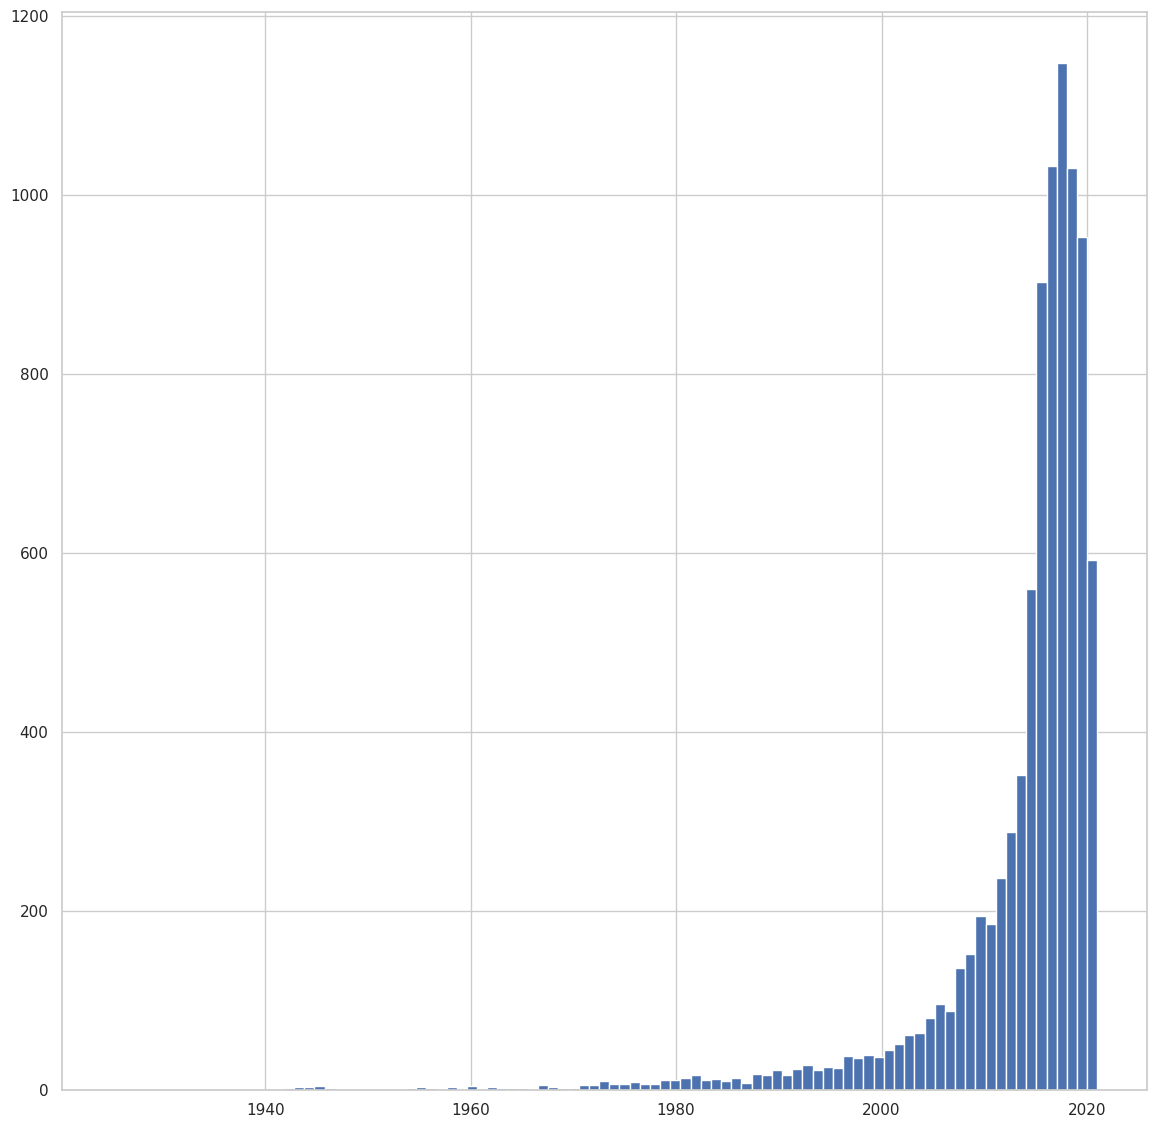

In [741]:
df_2=pd.DataFrame()
df_2=df['release_year']
range=df_2.max()-df_2.min()
df_2.hist(bins=range+1)

Podemos ver que la gran mayoría de las películas salieron después del año 2000, y que hay una baja cantidad de películas previo a esta fecha. Hay una muy baja cantidad de películas que salieron antes año 1980, que no es posible de apreciar en magnitud en esta visualización.

(3) Veamos la proporción de clasificaciones por edad, en un gráfico circular y de barras.

In [742]:
df_3=pd.DataFrame()
df_3=df['rating'].value_counts()/len(df)

<Axes: ylabel='count'>

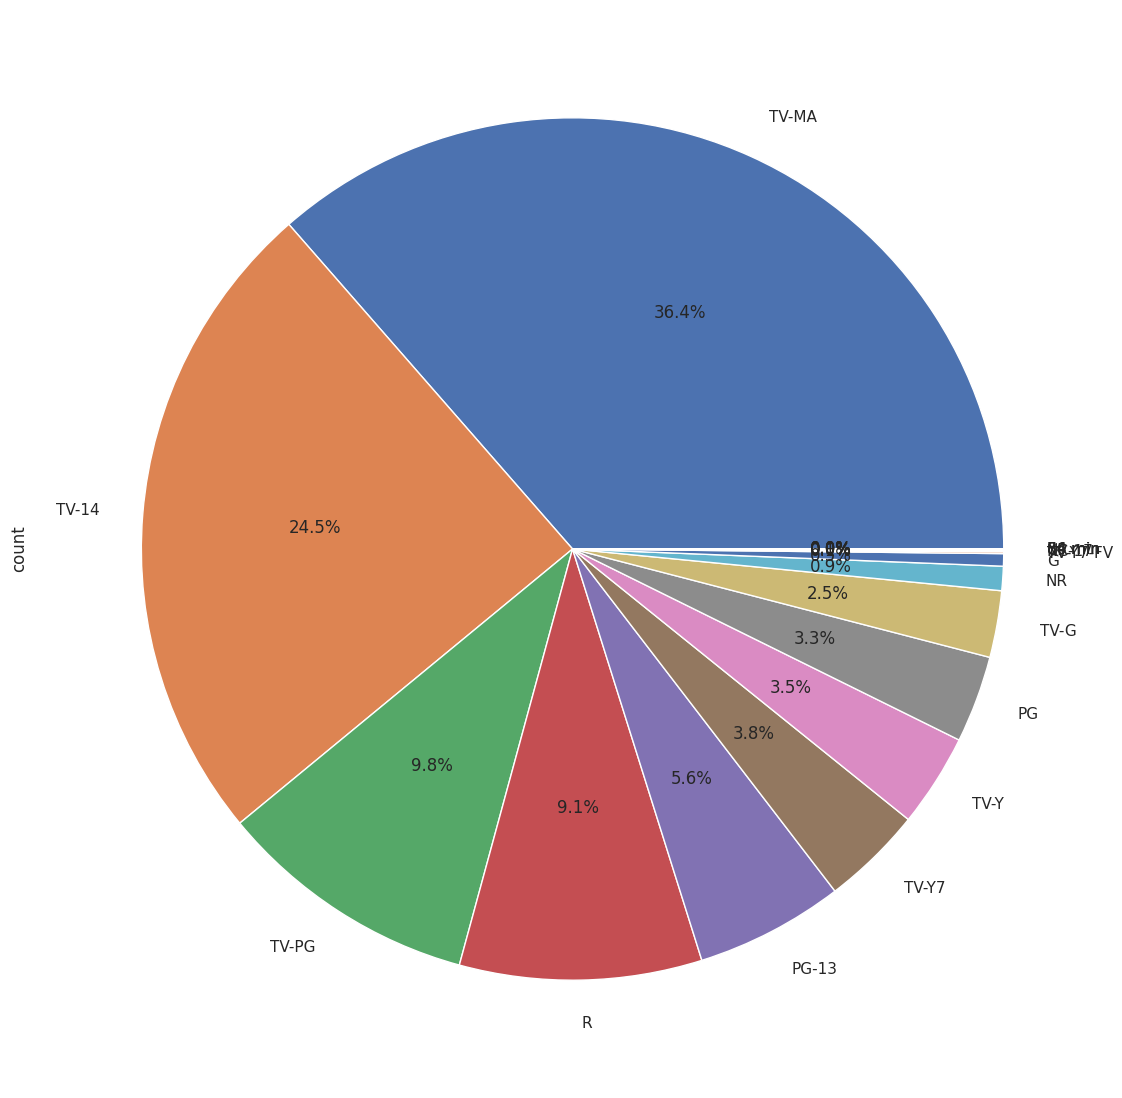

In [743]:
df_3.plot(kind='pie',autopct='%1.1f%%')

Podemos ver que la información no queda muy clara en el gráfico circular, pues hay varios ratings que aparecen en baja proporción. Hagamos un gráfico de barras para ver si es más clara esta proporción.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'TV-MA'),
  Text(1, 0, 'TV-14'),
  Text(2, 0, 'TV-PG'),
  Text(3, 0, 'R'),
  Text(4, 0, 'PG-13'),
  Text(5, 0, 'TV-Y7'),
  Text(6, 0, 'TV-Y'),
  Text(7, 0, 'PG'),
  Text(8, 0, 'TV-G'),
  Text(9, 0, 'NR'),
  Text(10, 0, 'G'),
  Text(11, 0, 'TV-Y7-FV'),
  Text(12, 0, 'NC-17'),
  Text(13, 0, 'UR'),
  Text(14, 0, '74 min'),
  Text(15, 0, '84 min'),
  Text(16, 0, '66 min')])

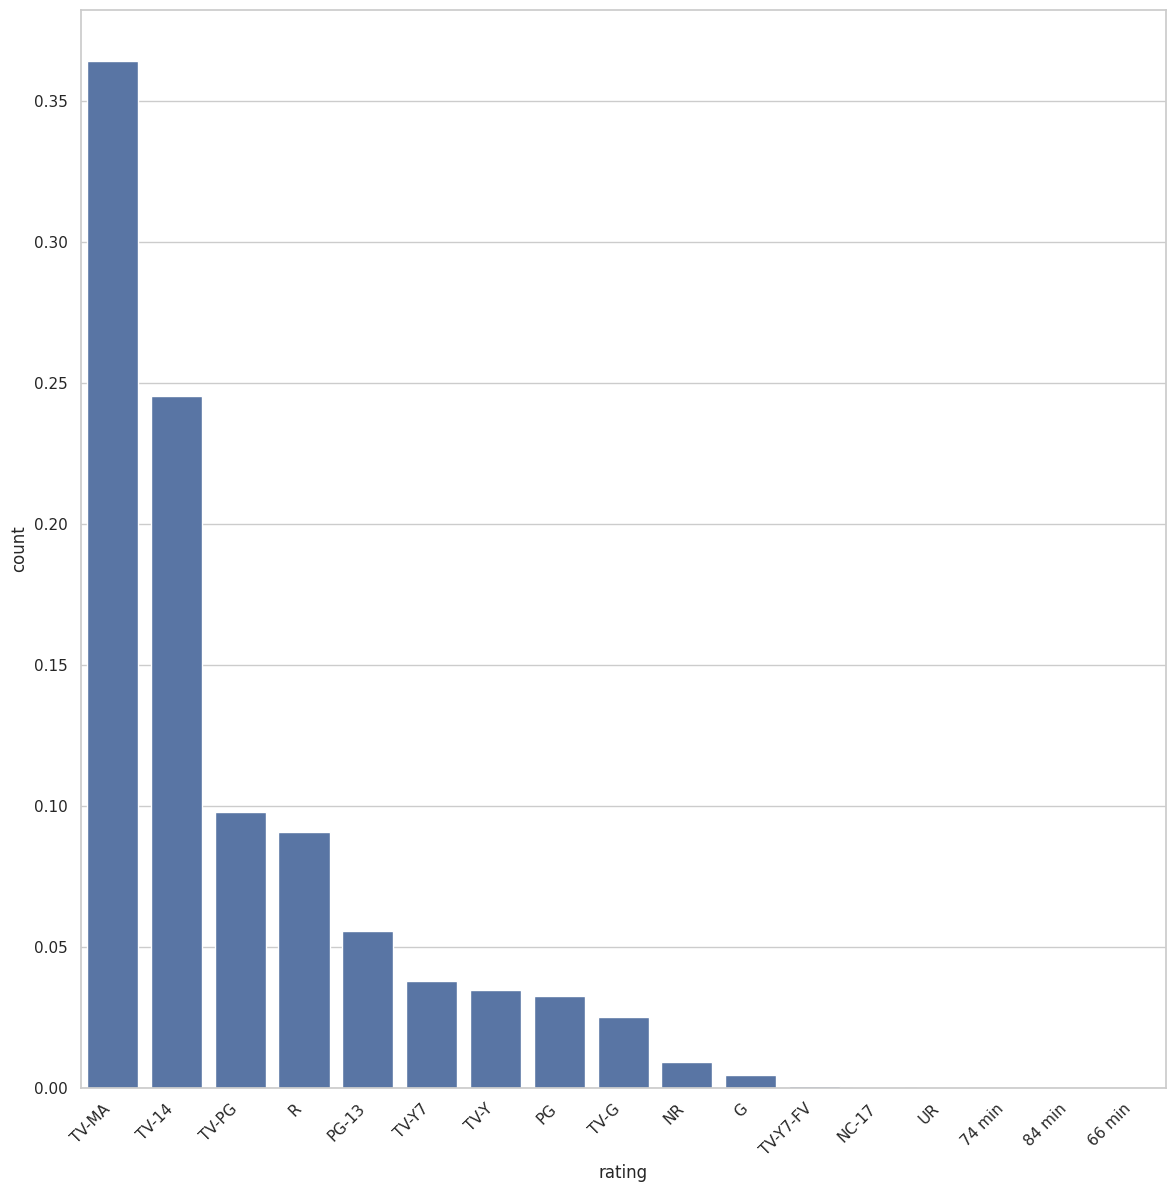

In [744]:
sns.barplot(df_3)
plt.xticks(rotation=45, ha='right')

Aquí queda bastante mas clara la proporción, y podemos ver que ciertos ratings dentro del dataframe son minutos de duración.

Podemos ver que la mayor parte de los ratings son TV-MA, TV-14 y TV-PG, que muestra que el contenido principal de Netflix está guiado para público adulto en vez del familiar o infantil.



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


(4) Transformemos la columna `date_added` a formato fecha. Ya hicimos esto en un laboratorio anterior (Lab 3), por lo que se hará el proceso sin mucha explicación. Aprovechemos de crear las columnas `year_added` y `month_added` como se pide en el siguiente ejercicio.

In [745]:
df_new=df.copy()
df_new['date_added'] = df['date_added'].str.strip()
mask = (df['date_added'].isnull() == True)
df_new.loc[mask,'date_added'] = 'January 1, 1900'
df_new['date_added'] = pd.to_datetime(df_new['date_added'])
df_new = df_new.assign(year_added=lambda x: x['date_added'].dt.year, month_added=lambda x: x['date_added'].dt.month)
df_new.loc[mask,['date_added','year_added','month_added']] = pd.NA
df_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0


Con esto, hagamos la serie temporal pedida.

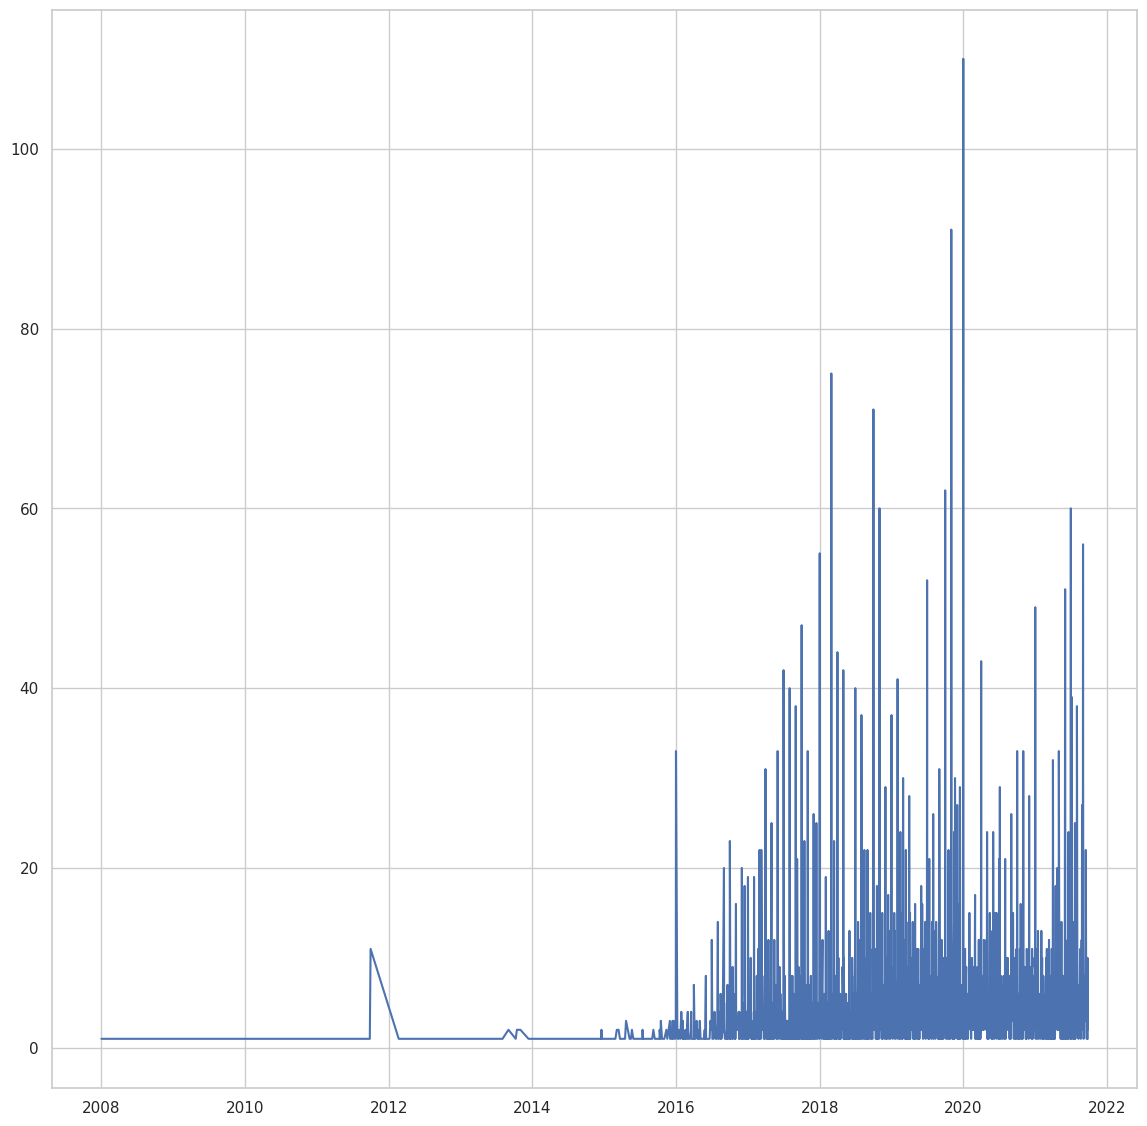

In [746]:
df_4=pd.DataFrame()
df_4=df_new['date_added'].value_counts().reset_index().sort_values(by='date_added',ascending=True)
plt.plot(df_4['date_added'],df_4['count'])

Podemos ver que el principal periodo de crecimiento empezó cerca del 2017, y se ha mantenido relativamente constante (con algunas fluctuaciones) hasta la fecha que registra este dataframe. El mayor volumen de títulos agregados ocurrió (visualmente) a fines de 2019 e inicios de 2020, que justo calza con el periodo de inicio de la pandemia global.

(5) Ya transformamos el dataframe para lo pedido. Hagamos el heatmap de lanzamientos por año y mes.

<Axes: xlabel='month_added', ylabel='year_added'>

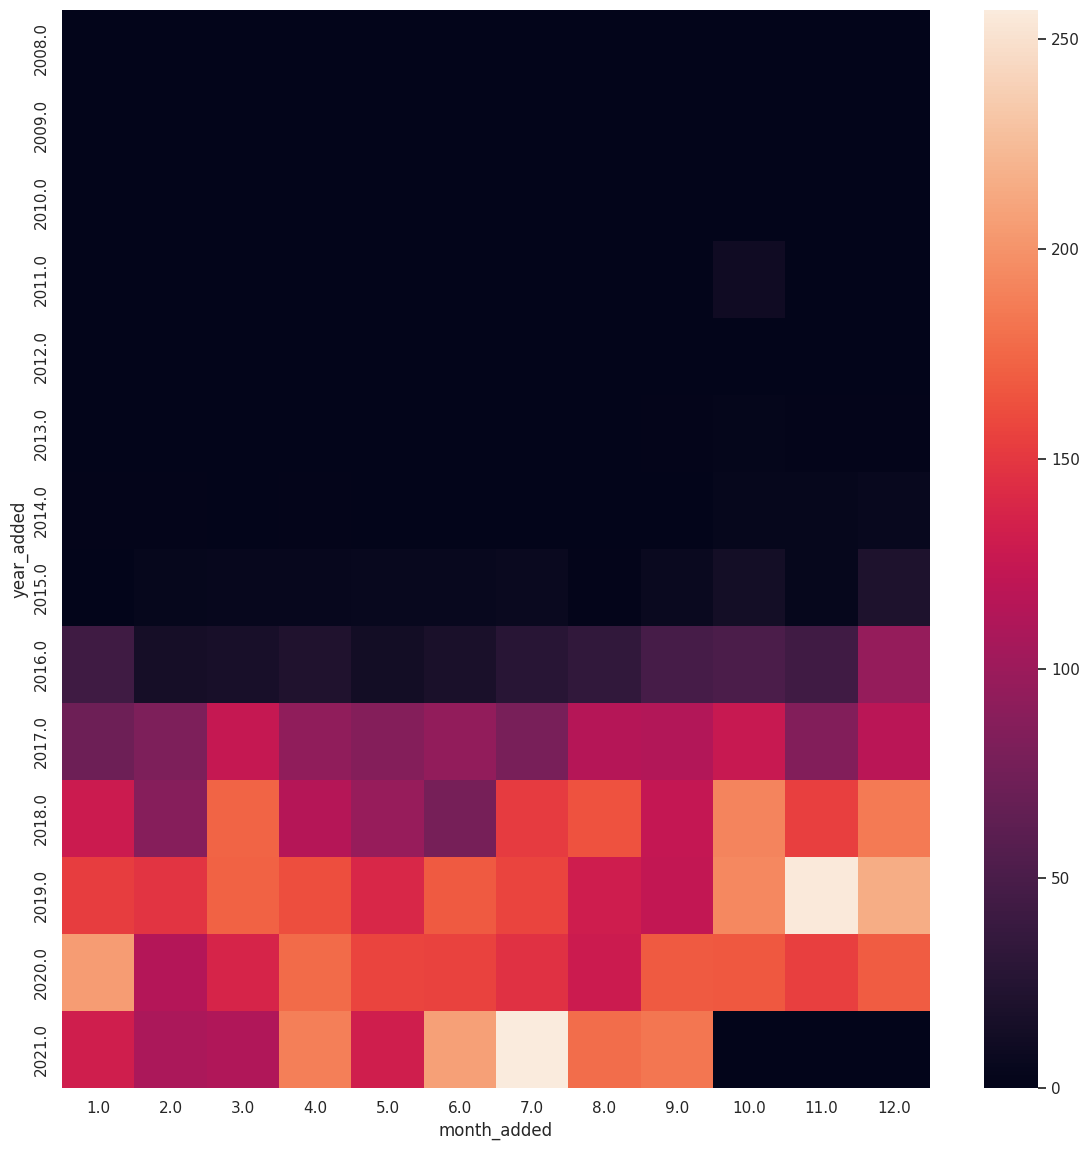

In [747]:
df_5=pd.DataFrame()
df_5=df_new.pivot_table(index='year_added', columns='month_added', aggfunc='size', fill_value=0)
sns.heatmap(df_5)

Aquí, el mes 1 corresponde a Enero, 2 a Febrero, y así hasta 12 para Diciembre. Podemos ver que entre fines de 2016 hasta Septiembre de 2021 se tienen registros. En este intervalo de tiempo, se puede ver que en general tiende a haber más lanzamientos en los meses de Octubre, Noviembre y Diciembre en comparación a los otros meses (cercano a fines de cada año). Esto corresponde a la epoca de Invierno en hemisferio norte, y Verano en el hemisferio sur. Además, en los meses de Abril, Mayo, Junio y Julio se puede apreciar un comportamiento similar, pero de menor escala.

(6) Primero, agrupemos las películas en un solo dataframe.

In [748]:
df_6=pd.DataFrame()
df_6=df[df['type']=='Movie']
df_6.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


Extraigamos los minutos de cada película, cambiando la columna `duration` por la cantidad numérica que representa en minutos.

In [749]:
df_6['duration'][df_6['duration'].isna()] = '0 min'
df_6['duration']=df_6['duration'].str.extract(r'^(\d+)').astype(int)
df_6.rename(columns={'duration':'duration_in_minutes'},inplace=True)
df_6['duration_in_minutes'].loc[df_6['duration_in_minutes'] == 0] = pd.NA
df_6.head()

/tmp/ipython-input-4266056430.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_6['duration'][df_6['duration'].isna()] = '0 min'
/tmp/ipython-input-4266056430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_in_minutes,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127.0,"Dramas, International Movies",After most of her family is murdered in a terr...


Ahora, transformemos este dataframe para que incluya la duracion por minutos de cada pelicula, y que desglose el género al cual pertenece. Agrupemos por el género de la película.

In [750]:
df_6=df_6[['duration_in_minutes','listed_in']]
df_6['listed_in'] = df_6['listed_in'].str.split(',')
df_6=df_6.explode('listed_in')
df_6['listed_in'] = df_6['listed_in'].str.strip()
df_6=df_6.groupby('listed_in')

,0
Action & Adventure,"Axes(0.1,0.77069;0.173913x0.12931)"
Anime Features,"Axes(0.308696,0.77069;0.173913x0.12931)"
Children & Family Movies,"Axes(0.517391,0.77069;0.173913x0.12931)"
Classic Movies,"Axes(0.726087,0.77069;0.173913x0.12931)"
Comedies,"Axes(0.1,0.615517;0.173913x0.12931)"
Cult Movies,"Axes(0.308696,0.615517;0.173913x0.12931)"
Documentaries,"Axes(0.517391,0.615517;0.173913x0.12931)"
Dramas,"Axes(0.726087,0.615517;0.173913x0.12931)"
Faith & Spirituality,"Axes(0.1,0.460345;0.173913x0.12931)"
Horror Movies,"Axes(0.308696,0.460345;0.173913x0.12931)"


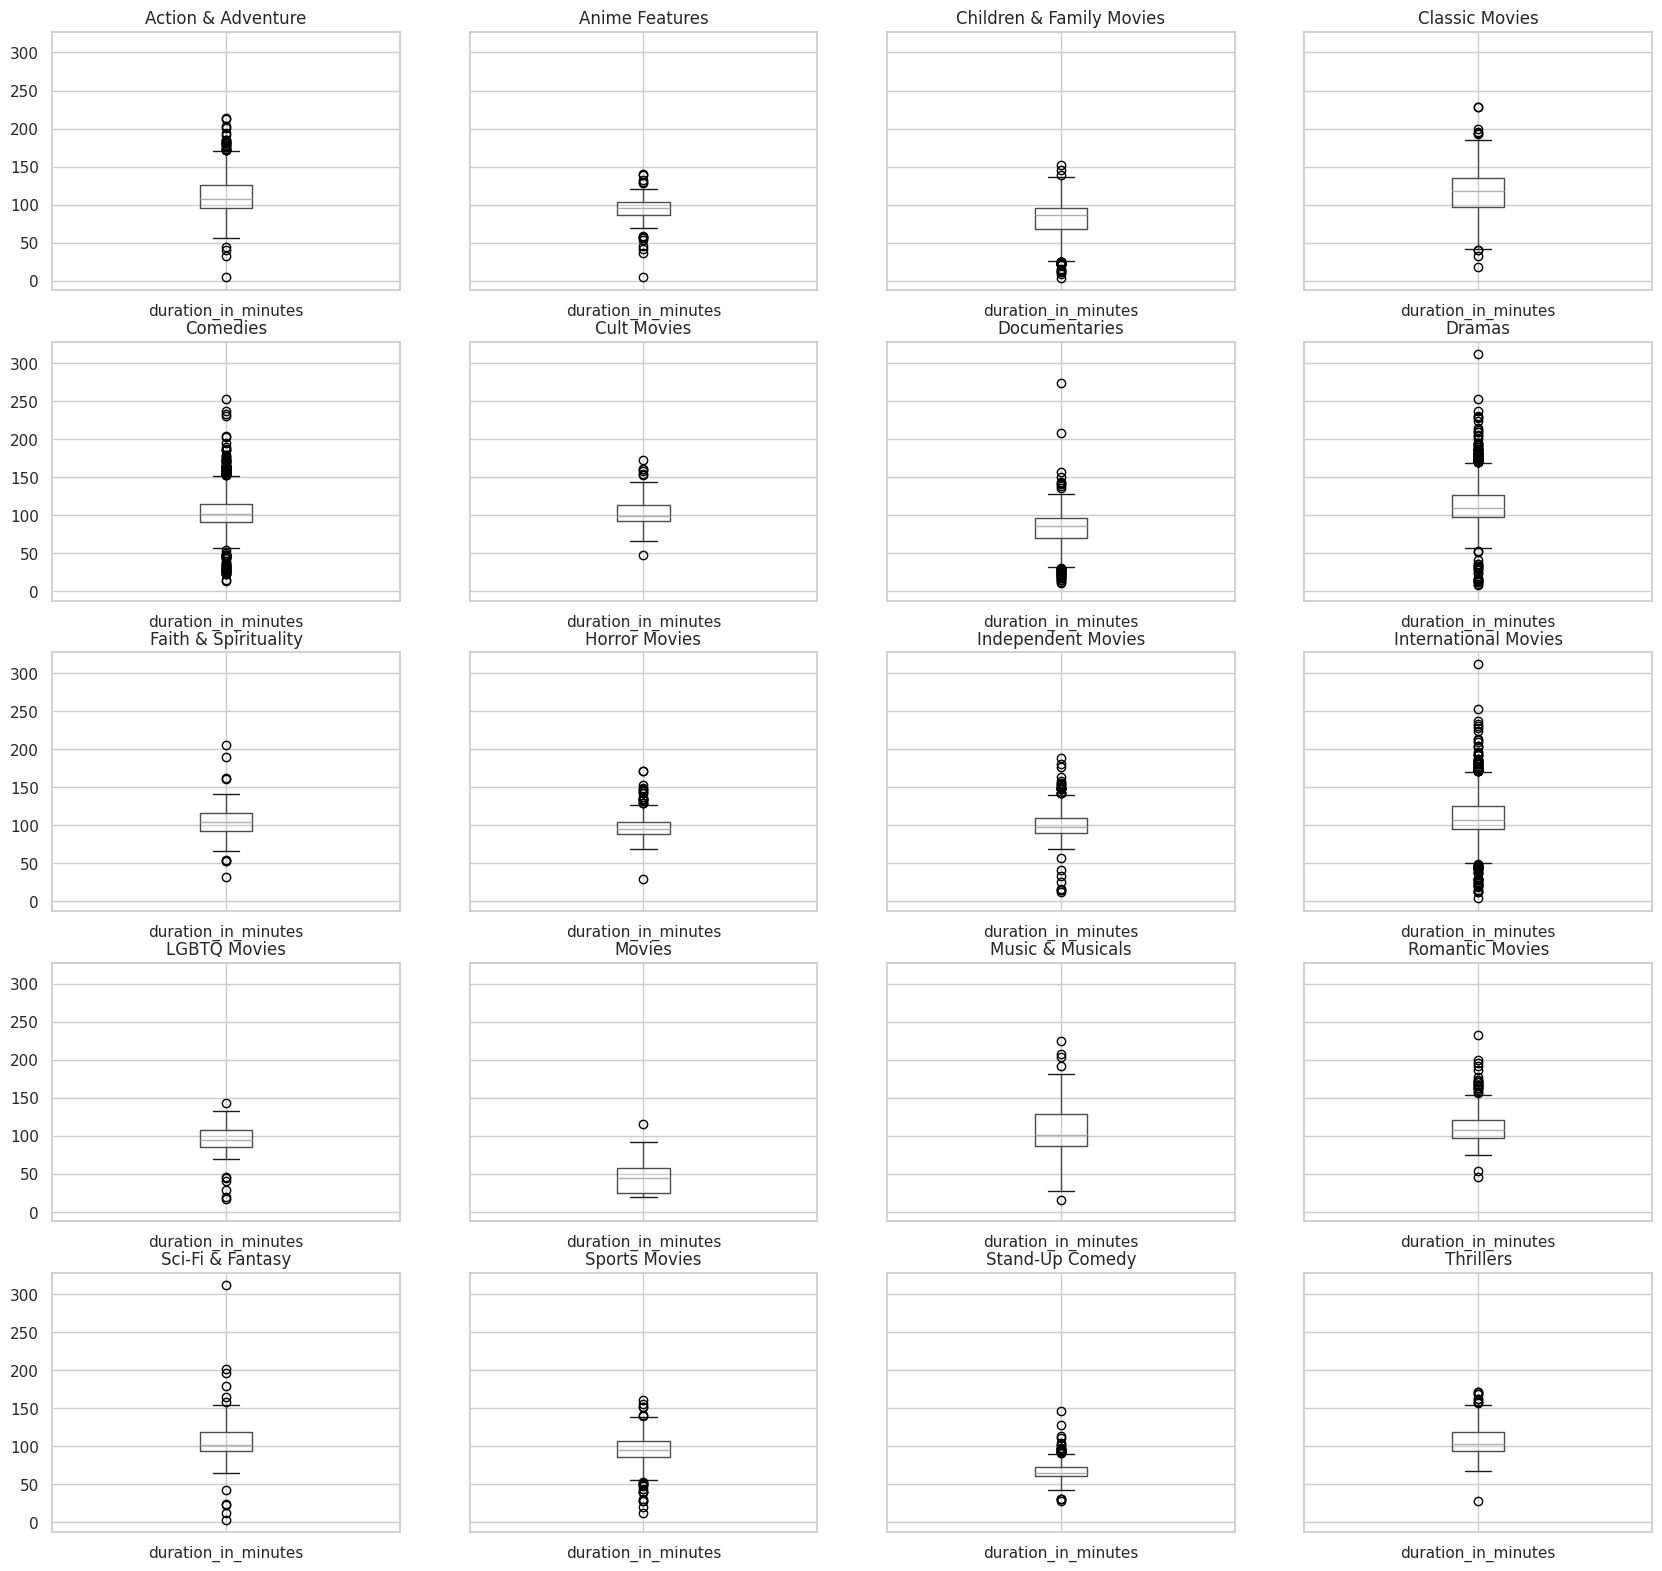

In [751]:
df_6.boxplot(figsize=(20,20))

En general, se percibe harta variabilidad del largo por película en cada género, y no se percibe un patron grande general. Si hay generos que tienen distribuciones parecidas, como (agrupandolos)
- Dramas, International Movies, Comedies
- Faith & Spirituality, LGBTQ Movies
- Cult Movies, Anime Features, Horror Movies, Thrillers.

En general, todos parecen tener una media bastante parecida y cercana a 100 minutos, aunque hay generos como Stand Up Comedy tienen media mas cercanos a los 60 minutos. Los generos que duran mas, con una duracion promedio cercana a 120 minutos, son Action & Adventure, Classic Movies y Dramas.



## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



(7) Consideremos un dataframe solo con los países y contemos la cantidad de producciones que tienen.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'South Korea'),
  Text(5, 0, 'Canada'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'France'),
  Text(8, 0, 'Mexico'),
  Text(9, 0, 'Egypt')])

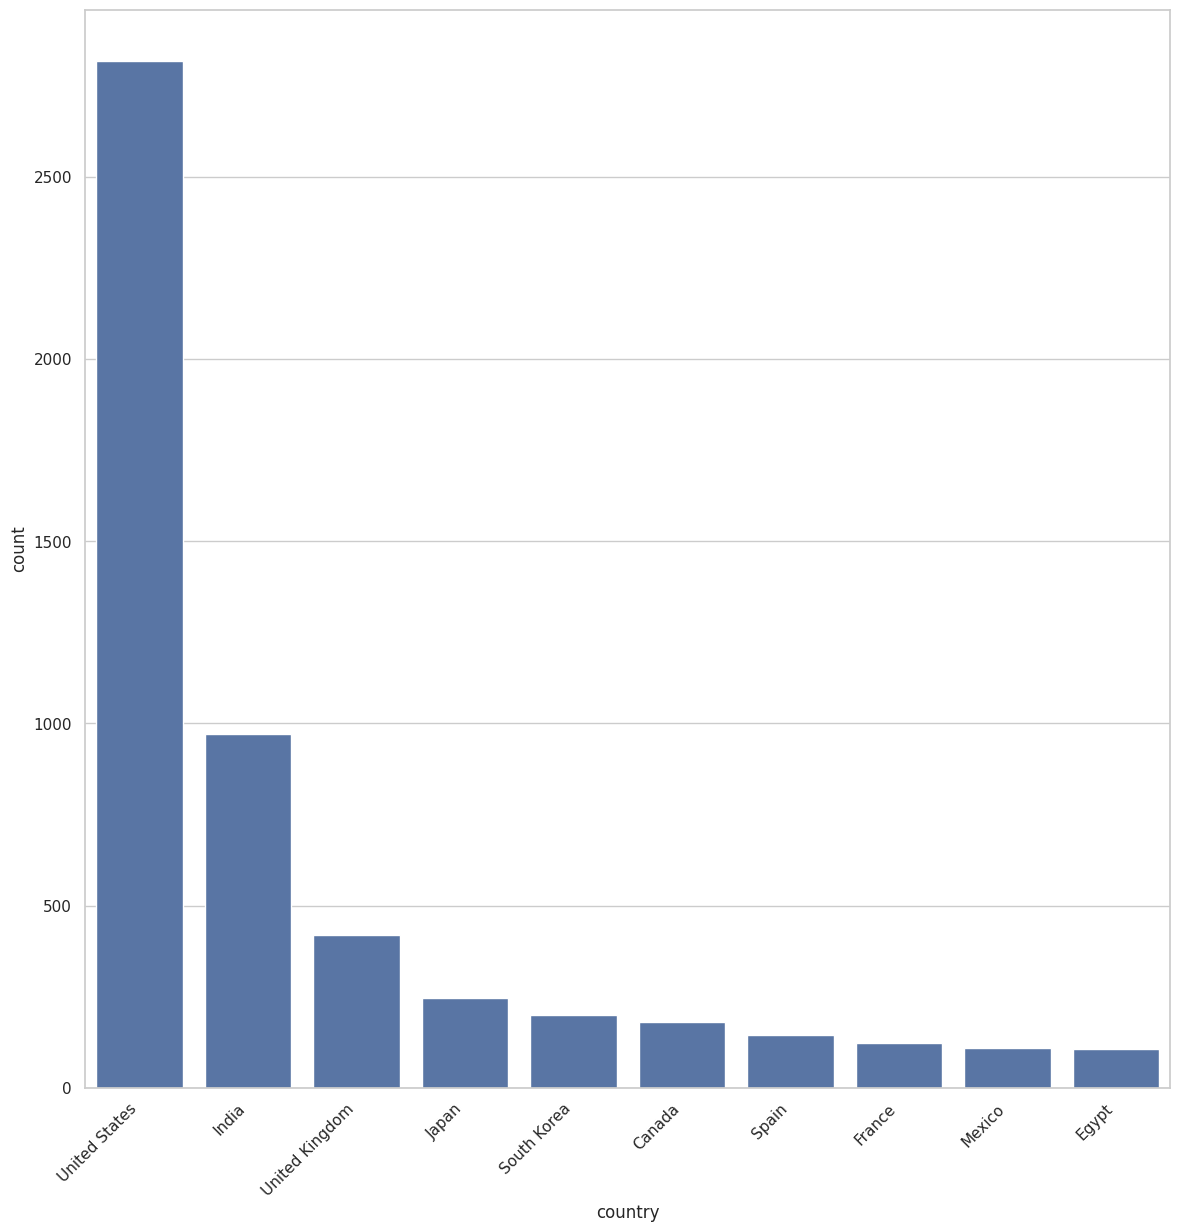

In [752]:
df_7=pd.DataFrame()
df_7=df['country'].value_counts().head(10)
sns.barplot(df_7)
plt.xticks(rotation=45, ha='right')

Podemos ver que la mayor parte de la producción proviene de Estados Unidos e India, donde Estados Unidos produce más que los otro nueve paises en el top 10. Esto es esperable por Hollywood, y también India como segundo por Bollywood.

(8) Veamos la cantidad de títulos por genero, separando por `Movie` y `TV Show`.

In [753]:
df_8=pd.DataFrame()
df_8=df[['title','type','listed_in']]
df_8['listed_in'] = df_8['listed_in'].str.split(',')
df_8=df_8.explode('listed_in').reset_index(drop=True)
df_8['listed_in'] = df_8['listed_in'].str.strip()
df_8

/tmp/ipython-input-4254371713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8['listed_in'] = df_8['listed_in'].str.split(',')


,title,type,listed_in
0,Dick Johnson Is Dead,Movie,Documentaries
1,Blood & Water,TV Show,International TV Shows
2,Blood & Water,TV Show,TV Dramas
3,Blood & Water,TV Show,TV Mysteries
4,Ganglands,TV Show,Crime TV Shows
...,...,...,...
19318,Zoom,Movie,Children & Family Movies
19319,Zoom,Movie,Comedies
19320,Zubaan,Movie,Dramas
19321,Zubaan,Movie,International Movies


Creemos un gráfico de barras apiladas con esta data.

<Axes: xlabel='listed_in'>

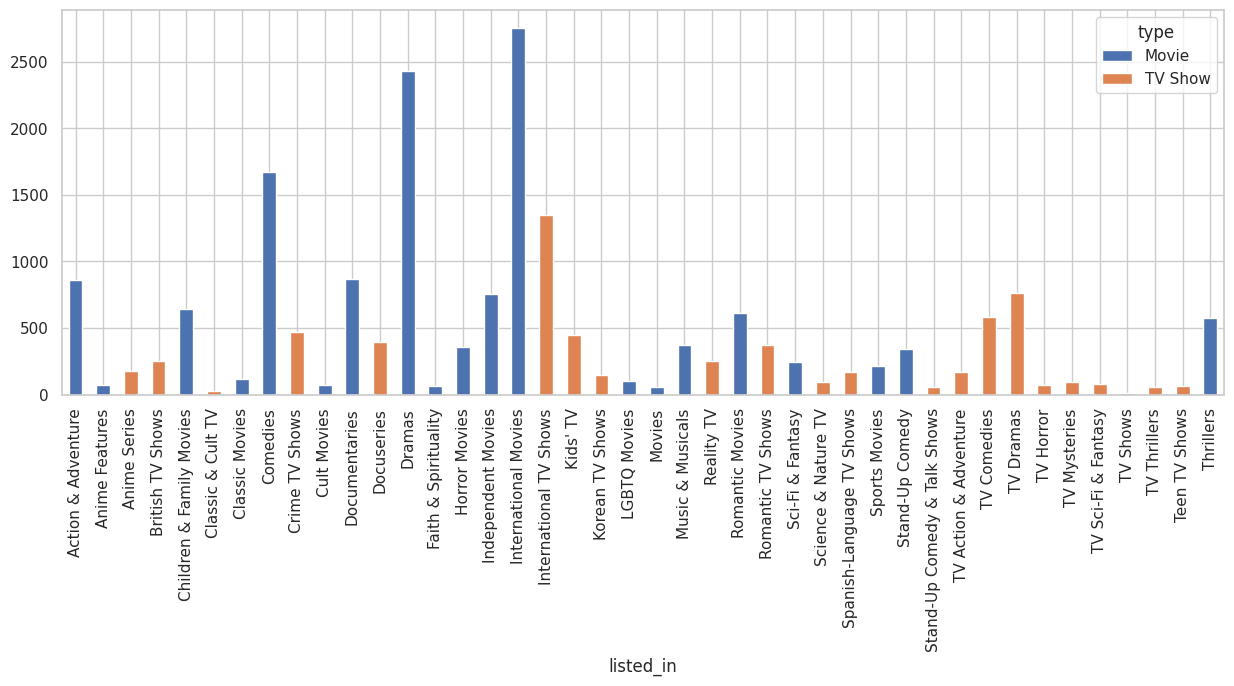

In [754]:
df_8.groupby(['listed_in', 'type']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 5))


Podemos ver que no se solapan, pues las categorias de televisión tienen "TV " especificado en su genero mientras que las películas tienen " Shows" al final. Quitemos estas palabras innecesarias (y algunas mas) y veamos que nos resulta.

<Axes: xlabel='listed_in'>

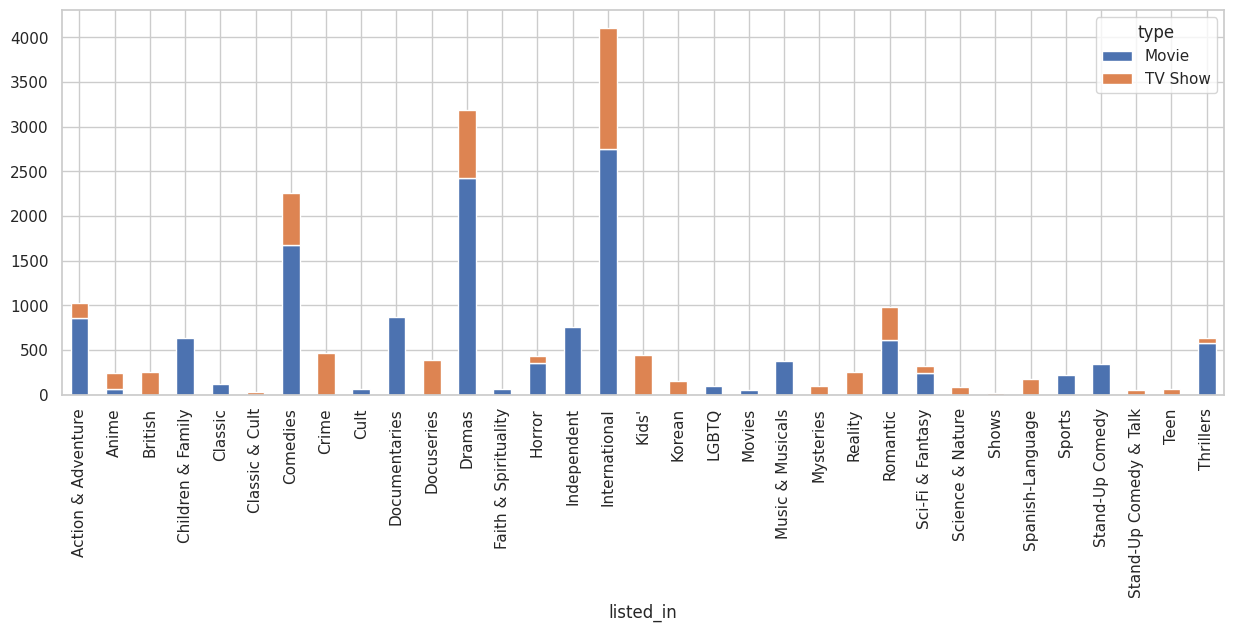

In [755]:
df_8['listed_in']=df_8['listed_in'].str.replace('TV ','').str.replace(' Shows','').str.replace(' Movies','').str.replace(' TV','').str.replace(' Features','').str.replace(' Series','')
df_8.groupby(['listed_in', 'type']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 5))

Vemos que esto está bastante mejor. Eso sí, hay unas categorías que deberían solaparse, como Classic & Cult y Stand-Up Comedy & Talk, pero proporcionalmente son muy pequeñas y no afectan mucho el análisis que se pide. En efecto, podemos ver que los géneros más abundantes en Netflix (en cantidad de títulos) son principalmente películas, que no es muy sorprendente por lo visto anteriormente. Hay generos que se pueden ver exclusivos para películas, como LGBTQ y Sports. Además, hay generos exclusivos para shows de televisión, como Mysteries, Reality y Science & Nature.

(9) Hagamos un scatterplot relacionando las variables `release_year` en el eje X y `duration` en minutos en el eje Y. Como solo las películas tienen duración en minutos, solo consideraremos películas dentro de este dataframe. Aprovechemos de usar el dataframe de la parte 2, pues ya esta trabajada.

In [756]:
df_9=pd.DataFrame()
df_9=df_new[['release_year','duration']].loc[df_new['type']=='Movie']
df_9['duration'][df_9['duration'].isna()] = '0 min'
df_9['duration']=df_9['duration'].str.extract(r'^(\d+)').astype(int)
df_9.rename(columns={'duration':'duration_in_minutes'},inplace=True)
df_9['duration_in_minutes'].loc[df_9['duration_in_minutes'] == 0] = pd.NA
df_9.head()

/tmp/ipython-input-4079261750.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_9['duration'][df_9['duration'].isna()] = '0 min'
/tmp/ipython-input-4079261750.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 

,release_year,duration_in_minutes
0,2020,90.0
6,2021,91.0
7,1993,125.0
9,2021,104.0
12,2021,127.0


Hagamos el scatterplot.

<Axes: xlabel='release_year', ylabel='duration_in_minutes'>

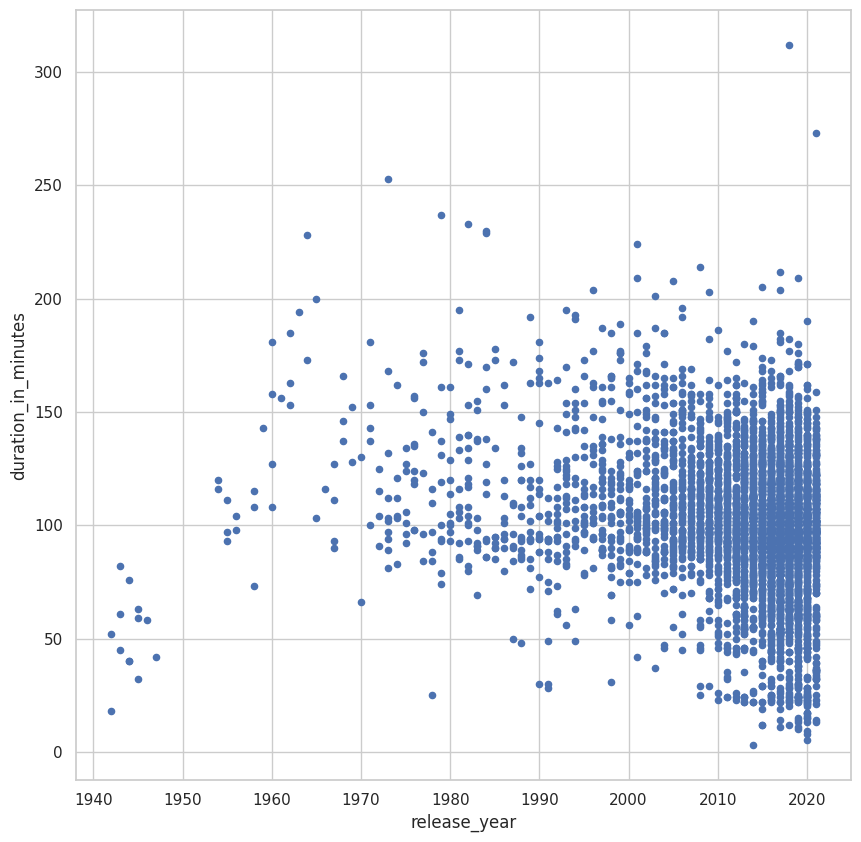

In [757]:
df_9.plot.scatter(x='release_year', y='duration_in_minutes',figsize=(10,10))

Se puede ver que a lo largo del tiempo la distribución de la duración en minutos con respecto al año de lanzamiento se empezó a concentrar cerca de los 90 minutos. Además, las primeras películas que fueron lanzadas estuvieron en el rango de 50 minutos, a lo largo del tiempo empezó a subir esta duración por sobre los 120 minutos, y ha estado lentamente bajando hasta aproximadamente 90 minutos hasta los datos vistos en este dataframe. Hay unos outliers en los últimos años con duración de más de 4 horas y de más de 5 horas.

## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

Veamos las combinaciones más frecuentes de género y rating, y representemoslo en un heatmap y en un gráfico de burbujas.

In [758]:
df_final=pd.DataFrame()
df_final=df[['listed_in','rating']]
df_final['listed_in'] = df_final['listed_in'].str.split(',')
df_final=df_final.explode('listed_in').reset_index(drop=True)
df_final['listed_in'] = df_final['listed_in'].str.strip()
df_final


/tmp/ipython-input-2382012585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['listed_in'] = df_final['listed_in'].str.split(',')


,listed_in,rating
0,Documentaries,PG-13
1,International TV Shows,TV-MA
2,TV Dramas,TV-MA
3,TV Mysteries,TV-MA
4,Crime TV Shows,TV-MA
...,...,...
19318,Children & Family Movies,PG
19319,Comedies,PG
19320,Dramas,TV-14
19321,International Movies,TV-14


Primero, hagamos el heatmap.

<Axes: xlabel='listed_in', ylabel='rating'>

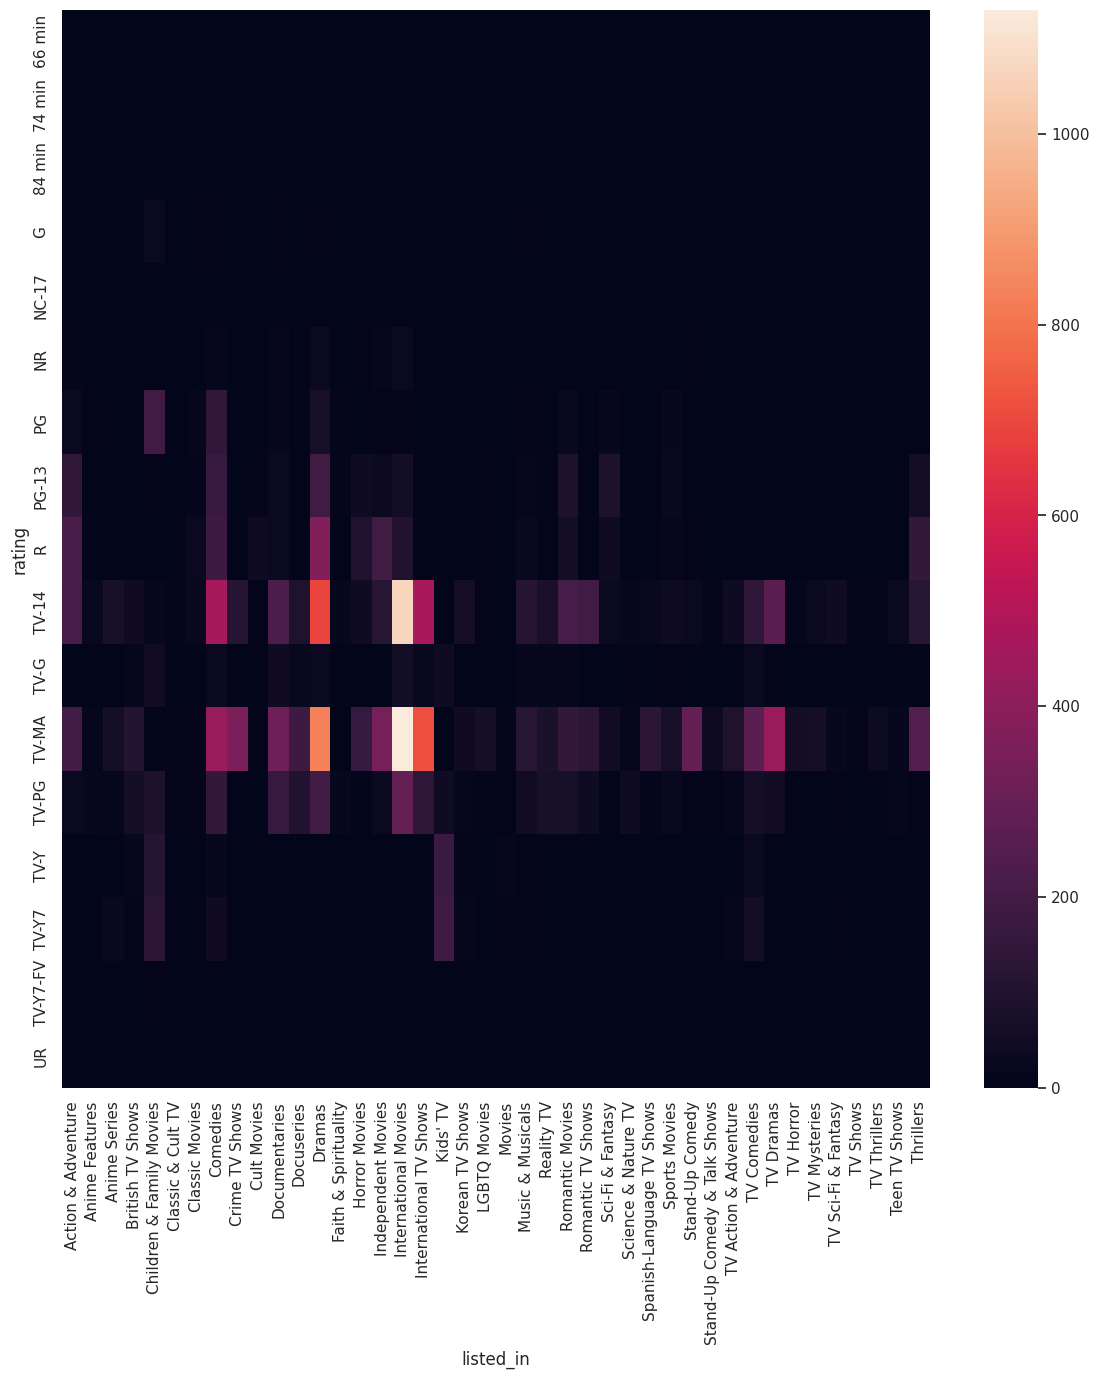

In [759]:
df_final_heatmap=df_final.pivot_table(index='rating', columns='listed_in', aggfunc='size', fill_value=0)
sns.heatmap(df_final_heatmap)

Podemos ver que las combinaciones más populares son
- International Movies (TV-MA)
- International Movies (TV-14)
- Dramas (TV-MA)

Veamos como se ve esto con el gráfico de burbujas.

In [760]:
df_final['bubble_size']=0
df_final=df_final.groupby(['listed_in','rating']).count().reset_index()
df_final.head()


,listed_in,rating,bubble_size
0,Action & Adventure,G,1
1,Action & Adventure,NR,9
2,Action & Adventure,PG,32
3,Action & Adventure,PG-13,148
4,Action & Adventure,R,220


<Axes: xlabel='rating', ylabel='listed_in'>

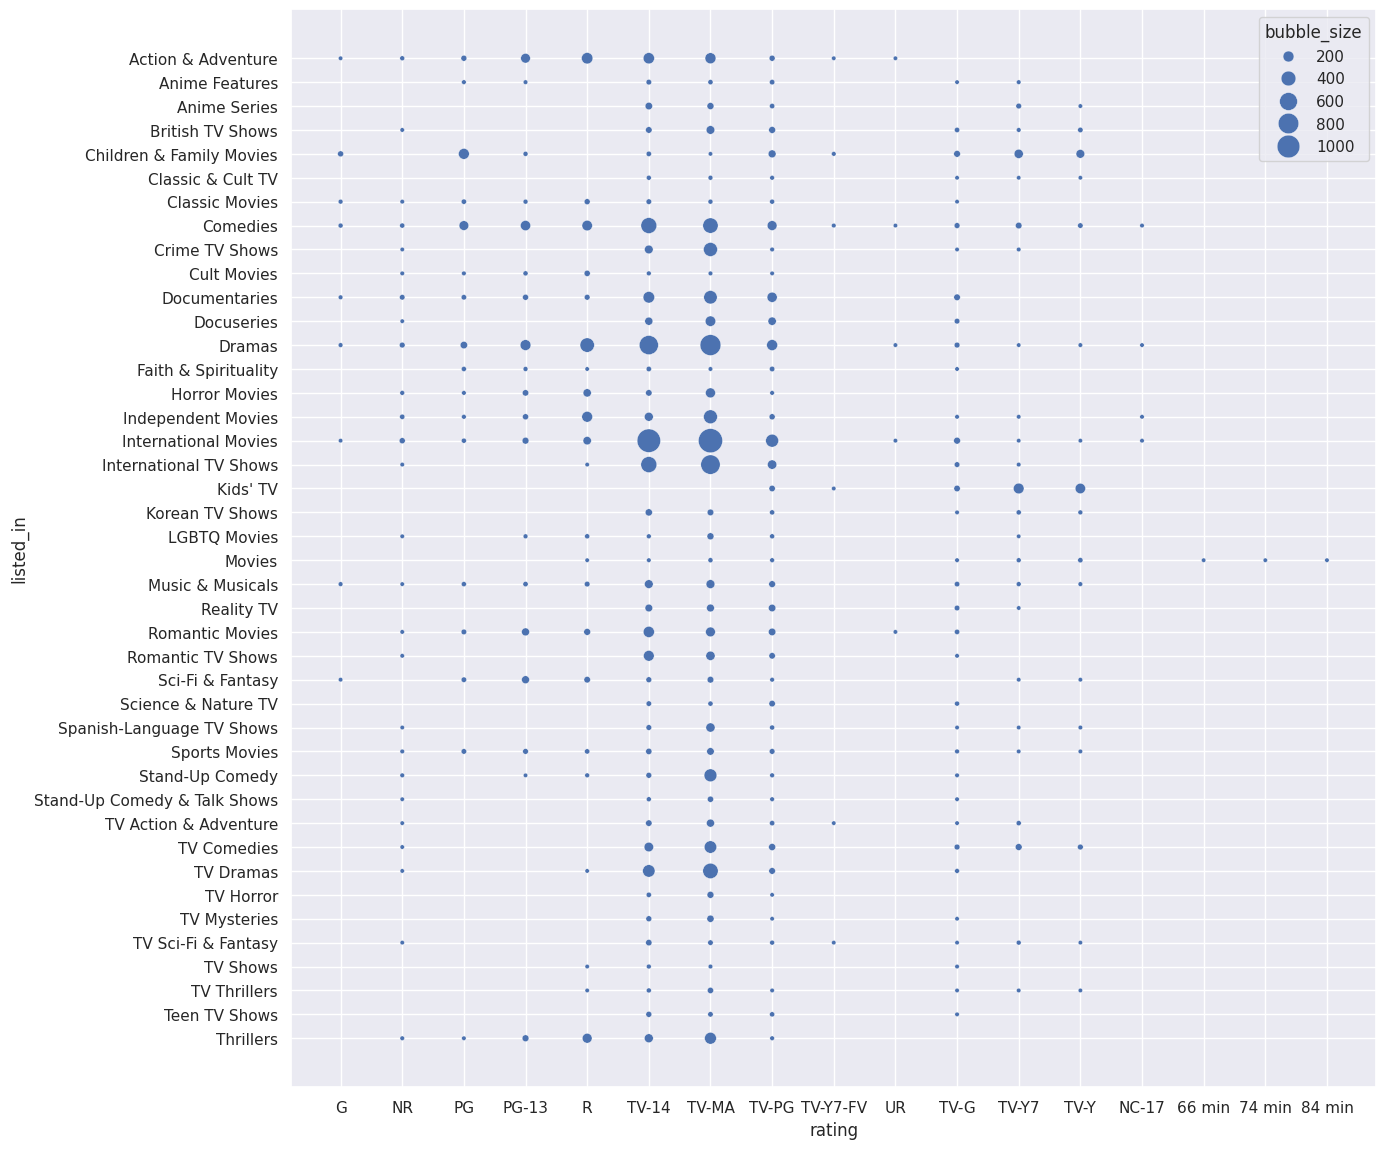

In [761]:
sns.set(rc={'figure.figsize':(14, 14)})
sns.scatterplot(data=df_final,x="rating",y="listed_in",size="bubble_size",sizes=(10,300))

Podemos ver que el tipo de información que se saca de este gráfico es bastante similar, aunque es mucho mas facil saber si hay alguna combinación de rating y género disponible en el catálogo. Eso sí, es más dificil distinguir entre las magnitudes de los valores presentados.